In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(path, grayscale=False):
    if grayscale:
        return cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    else:
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def display_image_and_histogram(image, title="Image", histogram_title="Histogram"):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(title)
    plt.axis('off')


    plt.subplot(1, 2, 2)
    if len(image.shape) == 2:
        plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    else:
        for i, color in enumerate(['red', 'green', 'blue']):
            plt.hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.5, label=f'{color.capitalize()} channel')
        plt.legend()

    plt.title(histogram_title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency of Pixels')
    plt.xlim([0, 256])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


def histogram_equalization(image):
    if len(image.shape) == 2:  # grayscale image
        equalized_img = cv2.equalizeHist(image)
    else:  # RGB image
        channels = cv2.split(image)
        eq_channels = [cv2.equalizeHist(channel) for channel in channels]
        equalized_img = cv2.merge(eq_channels)
    return equalized_img



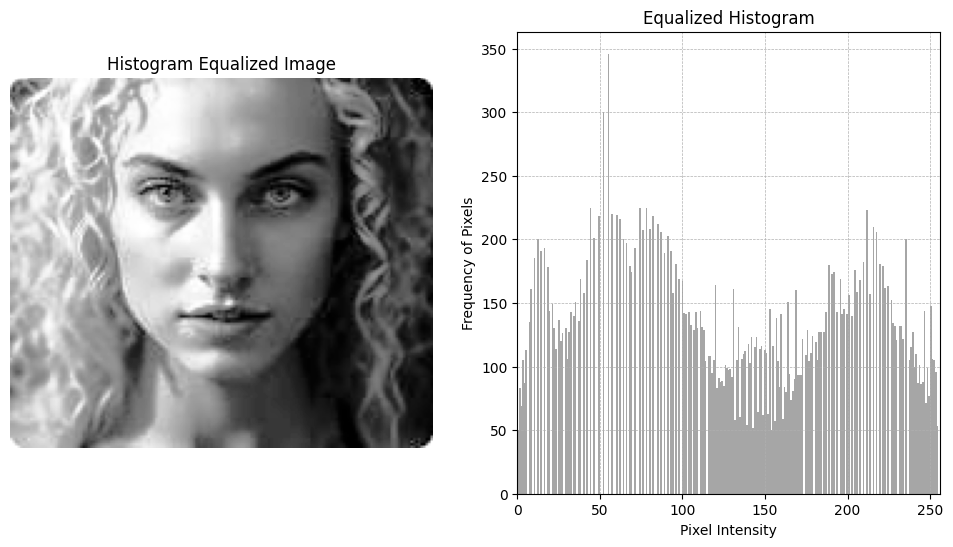

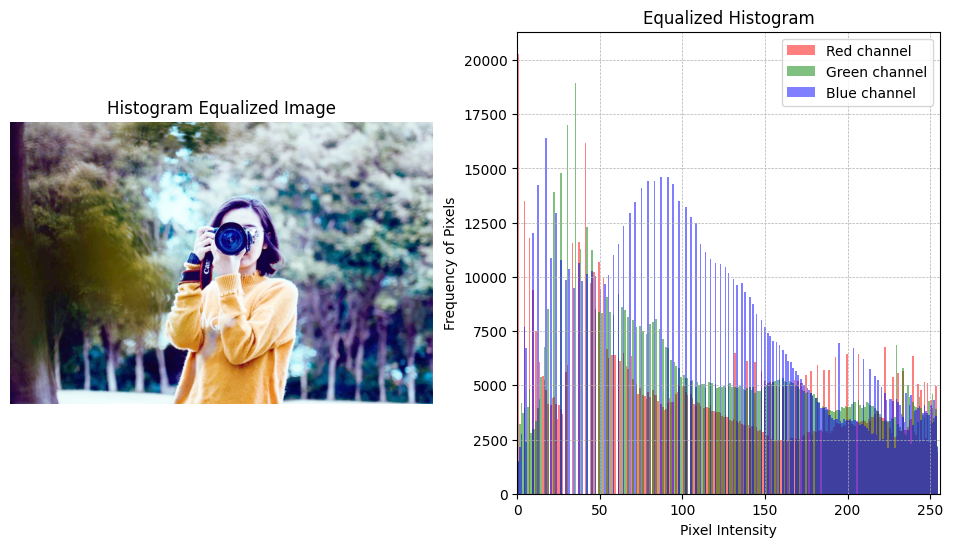

In [4]:
# Third Image
image_path =  '../images/greyscale.jpeg'
image = load_image(image_path, grayscale=True)

# Histogram Equalization
he_image = histogram_equalization(image)
display_image_and_histogram(he_image, "Histogram Equalized Image", "Equalized Histogram")

image_path =  '../images/rgb.jpg'
image = load_image(image_path, grayscale=False)

# Histogram Equalization
he_image = histogram_equalization(image)
display_image_and_histogram(he_image, "Histogram Equalized Image", "Equalized Histogram")